## CSC2042S 2025 Assignment 1: Unsupervised Learning

### By Sivuyise Matwa - MTWSIV004

### August 17, 2025

### Introdution
This document focuses on application of K-means clustering to analyze global development patterns using the World Development Indicators (WDI) dataset. It focuses on the practical challenges of applying clustering to real-world data, model optimization strategies, and interpretation of results.

###  1. Data Preprocessing
#### 1.1 Importing the  Libraries

In [63]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

The required libraries include Pandas (state the reason for why it is required, just for me to learn), 

#### 1.2 Importing the dataset 

In [17]:
df = pd.read_csv('./Data/WDICSV.csv')
# Settings to max of what can be displayed to be able to visualize the data iin my mind & see the data 
pd.set_option('display.max_rows', 100)     
pd.set_option('display.max_columns', 100)


#### 1.3 Exploratory Data Analysis (EDA) on Original Data
Understanding the dataset structure, content and characteristics

In [18]:
df.shape

(403256, 69)

In [161]:
%%capture
df.head()

In [10]:
## %%capture
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
403251,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.30,NaN,NaN,NaN,NaN,NaN,NaN,24.300000,NaN,NaN,NaN,NaN,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403252,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN,NaN,4.600000,NaN,NaN,NaN,NaN,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.40000,NaN,NaN,NaN,NaN,NaN
403253,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.1,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,28.70,NaN,NaN,NaN,NaN,NaN,NaN,33.600000,NaN,NaN,NaN,NaN,30.500000,NaN,NaN,NaN,32.400000,NaN,NaN,NaN,33.70000,NaN,NaN,NaN,NaN,NaN
403254,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.076837,53.60739,54.035907,54.407732,54.731516,55.035718,55.309422,55.566932,55.82213,56.09,56.363011,56.633647,56.891634,57.124922,57.32537,57.501543,57.657077,57.775562,57.858222,57.946631,58.794195,58.994812,59.241862,59.477935,59.606951,59.740456,59.888983,60.053623,60.216147,60.37761,60.551609,60.69318,60.825294,NaN,NaN
403255,Zimbabwe,ZWE,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82000.000000,82000.00000,79000.000000,74000.000000,68000.000000,62000.000000,57000.000000,52000.000000,48000.00000,45000.00,42000.000000,41000.000000,39000.000000,37000.000000,36000.00000,34000.000000,32000.000000,30000.000000,29000.000000,27000.000000,27000.000000,22000.000000,21000.000000,20000.000000,18000.000000,16000.000000,14000.000000,11000.000000,8400.000000,6900.00000,5900.000000,5200.00000,4900.000000,NaN,NaN


In [44]:

df.isnull().sum().to_frame().T

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,0,365342,360225,358940,358006,357504,355421,355393,354742,354128,353346,329744,324796,323040,322366,320950,317243,315136,312637,311893,310941,306462,304955,304673,303727,303014,300657,299896,299511,300074,298525,273152,265225,262145,259564,257254,250291,242665,249183,239613,240521,205040,217351,207688,206975,203423,193841,192471,189637,189845,186907,176478,179507,178216,179514,174217,171909,174225,175035,176334,180882,186372,190305,210742,253087,331003


In [47]:

df.isnull().sum()/df.shape[0]*100

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1960              90.598032
1961              89.329111
1962              89.010455
1963              88.778840
1964              88.654354
1965              88.137808
1966              88.130865
1967              87.969429
1968              87.817168
1969              87.623247
1970              81.770389
1971              80.543377
1972              80.107922
1973              79.940782
1974              79.589640
1975              78.670373
1976              78.147876
1977              77.528171
1978              77.343673
1979              77.107594
1980              75.996885
1981              75.623177
1982              75.553247
1983              75.318656
1984              75.141845
1985              74.557353
1986              74.368639
1987              74.273166
1988              74.412780
1989              74.028657
1990              67.736624
1991              65

In [163]:
%%capture
df.info()

In [197]:
%%capture
df.describe()

#### 1.4 Data Preparation and Imputation

In [21]:
# reshaping the data to long format

df_long = pd.melt(
    df,
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)

# Converting the Year, Value to integer, float
df_long['Year'] = df_long['Year'].astype(int)

In [30]:
df_long.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN


In [32]:
# Now reshaping the data to wide fromat to exactly how I want it to look like.
df_wide = df_long.pivot_table(
    index=['Country Name', 'Year'],
    columns='Indicator Name',
    values='Value'
)

In [31]:
df_wide.head(5)

Indicator Name     ARI treatment (% of children under 5 taken to a health provider)  \
Country Name Year                                                                     
Afghanistan  1960                                                NaN                  
             1961                                                NaN                  
             1962                                                NaN                  
             1963                                                NaN                  
             1964                                                NaN                  

Indicator Name     Access to clean fuels and technologies for cooking (% of population)  \
Country Name Year                                                                         
Afghanistan  1960                                                NaN                      
             1961                                                NaN                      
             1962                                                NaN                      
             1963                                                NaN                      
             1964                                                NaN                      

Indicator Name     Access to clean fuels and technologies for cooking, rural (% of rural population)  \
Country Name Year                                                                                      
Afghanistan  1960                                                NaN                                   
             1961                                                NaN                                   
             1962                                                NaN                                   
             1963                                                NaN                                   
             1964                                                NaN                                   

Indicator Name     Access to clean fuels and technologies for cooking, urban (% of urban population)  \
Country Name Year                                                                                      
Afghanistan  1960                                                NaN                                   
             1961                                                NaN                                   
             1962                                                NaN                                   
             1963                                                NaN                                   
             1964                                                NaN                                   

Indicator Name     Access to electricity (% of population)  \
Country Name Year                                            
Afghanistan  1960                                      NaN   
             1961                                      NaN   
             1962                                      NaN   
             1963                                      NaN   
             1964                                      NaN   

Indicator Name     Access to electricity, rural (% of rural population)  \
Country Name Year                                                         
Afghanistan  1960                                                NaN      
             1961                                                NaN      
             1962                                                NaN      
             1963                                                NaN      
             1964                                                NaN      

Indicator Name     Access to electricity, urban (% of urban population)  \
Country Name Year                                                         
Afghanistan  1960                                                NaN      
             1961                                                NaN      
             1962                

In [33]:
threshold = 0.7
# Get only the feature columns (exclude 'Year', keep 'Country' for grouping)
feature_columns = [col for col in df_wide.columns if col not in ['Year']]

# Filter: for each country, keep rows (years) with enough data
df_filtered = df_wide.groupby('Country Name', group_keys=False).apply(
    lambda g: g[g[feature_columns].notnull().mean(axis=1) >= threshold]
)

In [112]:
df_filtered.head(60)

Indicator Name     ARI treatment (% of children under 5 taken to a health provider)  \
Country Name Year                                                                     
Albania      2011                                                NaN                  
             2012                                                NaN                  
             2013                                                NaN                  
             2014                                                NaN                  
             2015                                                NaN                  
             2016                                                NaN                  
             2017                                                NaN                  
             2018                                               81.8                  
             2019                                                NaN                  
Argentina    2006                                                NaN                  
             2010                                                NaN                  
             2011                                                NaN                  
             2012                                               94.3                  
             2013                                                NaN                  
             2014                                                NaN                  
             2017                                                NaN                  
             2018                                                NaN                  
             2020                                               94.2                  
Armenia      2009                                                NaN                  
             2010                                               57.0                  
             2011                                                NaN                  
             2012                                                NaN                  
             2013                                                NaN                  
             2014                                                NaN                  
             2015                                                NaN                  
             2016                                               91.7                  
             2017                                                NaN                  
             2018                                                NaN                  
             2019                                                NaN                  
             2020                                                NaN                  
             2021                                                NaN                  
Azerbaijan   2010                                                NaN                  
Bangladesh   2005                                                NaN                  
             2006                                               30.0                  
             2010                                                NaN                  
             2011                                               35.2                  
             2013                                               35.8                  
             2016                                                NaN                  
             2017                                                NaN                  
             2018                                               40.3                  
Belarus      2012                                               93.4                  
             2013                                                NaN                  
             2014                                                NaN                  
             2015                                                NaN                 

In [34]:
df_filtered.isnull().sum().to_frame().T

Indicator Name,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, richest 60% (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, young adults (% of population ages 15-24)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Adjusted savings: net national savings (% of GNI),Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (% of GNI),...,"Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth

In [52]:
# Drop columns with more than 30% missing values
threshold = 0.3  # 30%
df_clean_partially = df_filtered.loc[:, df_filtered.isnull().mean() <= threshold]

In [55]:
df_clean_partially.isnull().sum().to_frame().T

Indicator Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Adjusted savings: net national savings (% of GNI),Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (% of GNI),Adjusted savings: particulate emission damage (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adolescents out of school (% of lower secondary school age),Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural land (% of land area),Agricultural land (sq. km),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2015 US$)","Agriculture, forestry, and fishing, value added (constant LCU)",...,Transport services (% of commercial service imports),"Transport services (% of service exports, BoP)","Transport services (% of service imports, BoP)",Travel services (% of commercial service exports),Travel services (% of commercial service imports),"Travel services (% of service exports, BoP)","Travel services (% of service imports, BoP)","Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment with advanced education, female (% of female labor force with advanced education)","Unemployment with advanced education, male (% of male labor force with advanced education)",Unemployment with basic education (% of total labor force with basic education),"Unemployment with basic education, female (% of female labor force with basic education)","Unemployment with basic education, male (% of male labor force with basic education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate educat

In [61]:
# Filling missing with feature mean across the country
## I feel like the mean works best here so I will be using it instead of median of any other messuare
df_clean = df_clean_partially.fillna(df_clean_partially.mean(numeric_only=True))

#### 1.5 EDA on Prepared data

In [58]:
df_clean.head()

Indicator Name     Access to clean fuels and technologies for cooking (% of population)  \
Country Name Year                                                                         
Albania      2011                                               69.1                      
             2012                                               71.3                      
             2013                                               73.1                      
             2014                                               75.2                      
             2015                                               76.6                      

Indicator Name     Access to clean fuels and technologies for cooking, rural (% of rural population)  \
Country Name Year                                                                                      
Albania      2011                                              47.80                                   
             2012                                              50.55                                   
             2013                                              53.10                                   
             2014                                              55.20                                   
             2015                                              57.80                                   

Indicator Name     Access to clean fuels and technologies for cooking, urban (% of urban population)  \
Country Name Year                                                                                      
Albania      2011                                               87.7                                   
             2012                                               88.8                                   
             2013                                               89.9                                   
             2014                                               90.7                                   
             2015                                               91.2                                   

Indicator Name     Access to electricity (% of population)  \
Country Name Year                                            
Albania      2011                                     99.7   
             2012                                     99.9   
             2013                                     99.9   
             2014                                    100.0   
             2015                                    100.0   

Indicator Name     Access to electricity, rural (% of rural population)  \
Country Name Year                                                         
Albania      2011                                              100.0      
             2012                                               99.9      
             2013                                               99.8      
             2014                                               99.9      
             2015                                              100.0      

Indicator Name     Access to electricity, urban (% of urban population)  \
Country Name Year                                                         
Albania      2011                                               99.5      
             2012                                               99.9      
             2013                                               99.9      
             2014                                              100.0      
             2015                                              100.0      

Indicator Name     Adjusted net enrollment rate, primary (% of primary school age children)  \
Country Name Year                                                                             
Albania      2011                                           86.99052                          
             2012                                           89.53195                          
             2013                    

In [59]:
##%%capture
df_clean.tail()

Indicator Name     Access to clean fuels and technologies for cooking (% of population)  \
Country Name Year                                                                         
Ukraine      2020                                               95.1                      
Viet Nam     2010                                               49.8                      
             2012                                               60.4                      
             2014                                               72.1                      
Zimbabwe     2011                                               30.2                      

Indicator Name     Access to clean fuels and technologies for cooking, rural (% of rural population)  \
Country Name Year                                                                                      
Ukraine      2020                                               88.4                                   
Viet Nam     2010                                               35.3                                   
             2012                                               48.1                                   
             2014                                               62.7                                   
Zimbabwe     2011                                                4.9                                   

Indicator Name     Access to clean fuels and technologies for cooking, urban (% of urban population)  \
Country Name Year                                                                                      
Ukraine      2020                                               99.1                                   
Viet Nam     2010                                               82.5                                   
             2012                                               87.4                                   
             2014                                               91.7                                   
Zimbabwe     2011                                               80.8                                   

Indicator Name     Access to electricity (% of population)  \
Country Name Year                                            
Ukraine      2020                                    100.0   
Viet Nam     2010                                     97.4   
             2012                                     97.9   
             2014                                     99.2   
Zimbabwe     2011                                     36.9   

Indicator Name     Access to electricity, rural (% of rural population)  \
Country Name Year                                                         
Ukraine      2020                                              100.0      
Viet Nam     2010                                               96.4      
             2012                                               97.0      
             2014                                               98.9      
Zimbabwe     2011                                               14.1      

Indicator Name     Access to electricity, urban (% of urban population)  \
Country Name Year                                                         
Ukraine      2020                                              100.0      
Viet Nam     2010                                               99.9      
             2012                                               99.8      
             2014                                               99.9      
Zimbabwe     2011                                               83.2      

Indicator Name     Adjusted net enrollment rate, primary (% of primary school age children)  \
Country Name Year                                                                             
Ukraine      2020                                          92.519786                          
Viet Nam     2010                                          98.138810                          
             2012                    

In [62]:
df_clean.isnull().sum().to_frame().T

Indicator Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Adjusted savings: net national savings (% of GNI),Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (% of GNI),Adjusted savings: particulate emission damage (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adolescents out of school (% of lower secondary school age),Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural land (% of land area),Agricultural land (sq. km),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2015 US$)","Agriculture, forestry, and fishing, value added (constant LCU)",...,Transport services (% of commercial service imports),"Transport services (% of service exports, BoP)","Transport services (% of service imports, BoP)",Travel services (% of commercial service exports),Travel services (% of commercial service imports),"Travel services (% of service exports, BoP)","Travel services (% of service imports, BoP)","Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment with advanced education, female (% of female labor force with advanced education)","Unemployment with advanced education, male (% of male labor force with advanced education)",Unemployment with basic education (% of total labor force with basic education),"Unemployment with basic education, female (% of female labor force with basic education)","Unemployment with basic education, male (% of male labor force with basic education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate educat

# NOW AT THIS POINT, THE DATA IS CLEAN AND READY TO BE VISUALISED

In [68]:
df_clean.shape

(469, 1005)

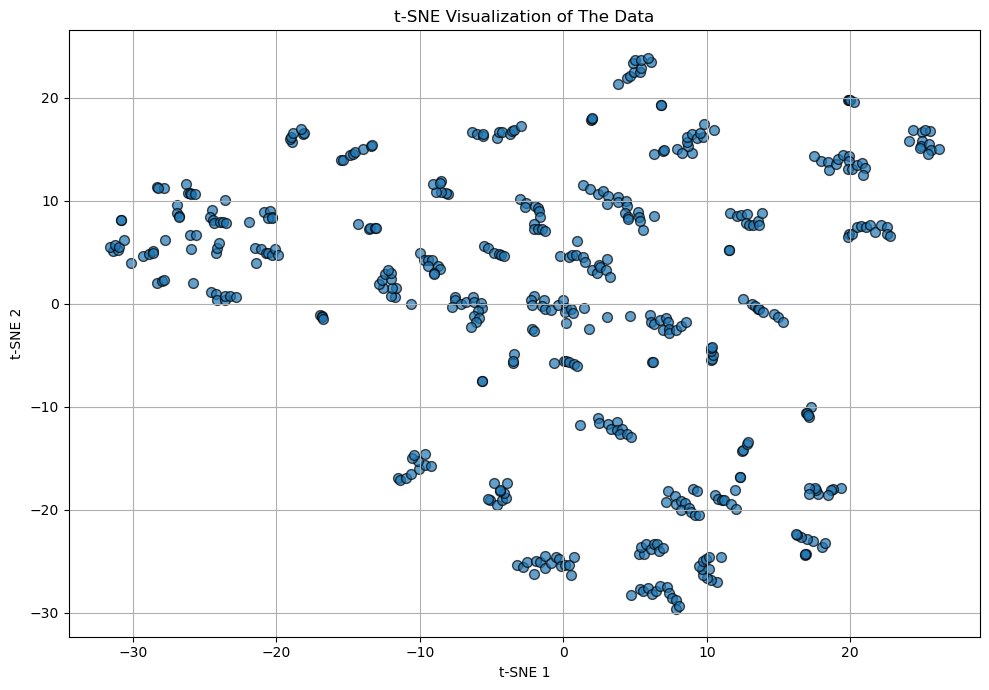

In [73]:
# Now using t-SNE and matlibplot, we visualising the data..
# Firsly we dont have any none numerical colums
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_result = tsne.fit_transform(scaled_data)

# Step 3: Plot the t-SNE result
plt.figure(figsize=(10, 7))  # Sets the figure size in inches (width, height).
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, alpha=0.7, edgecolors='k') # s=50 → size of each point  edgecolors='k' → black borders around points  alpha=0.7 → transparency (1 = solid, 0 = invisible)
plt.title('t-SNE Visualization of The Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# QUESTION 2

In [101]:
class KMeanClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroid):
        return np.sqrt(np.sum((centroid-data_point)**2, axis=1))
        
    def fit(self, X, max_iterations = 100):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        for _ in range(max_iterations):
            y= []
            for data_point in X:
                distances = KMeanClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y=np.array(y)

            cluster_indices = []
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)


        return y



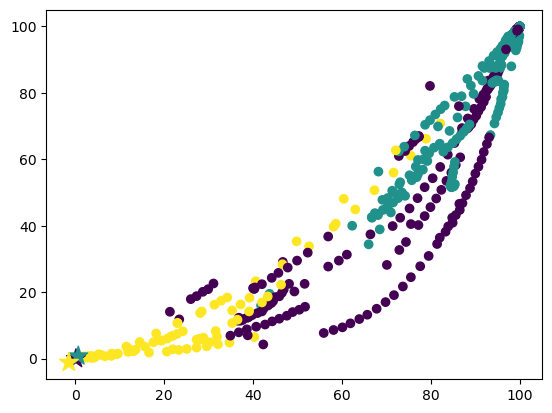

In [109]:
# Instantiate and fit the model
kmeans = KMeanClustering(k=3)
labels = kmeans.fit(scaled_data)

data = df_clean.to_numpy()

plt.scatter(data[:,0], data[:,1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c=range(len(kmeans.centroids)), marker='*', s=200)
plt.show()

In [86]:
import numpy as np

def kmeans(X, k, max_iters=100, tol=1e-4, random_state=None):
    """
    Implements K-means clustering from scratch using NumPy.

    Parameters:
    - X: (n_samples, n_features) input data
    - k: number of clusters
    - max_iters: max number of iterations
    - tol: tolerance to declare convergence
    - random_state: seed for reproducibility

    Returns:
    - centroids: (k, n_features) final centroid positions
    - labels: (n_samples,) cluster assignment for each point
    """
    if random_state:
        np.random.seed(random_state)
    
    # Step 1: Initialize centroids by randomly selecting k data points
    n_samples, n_features = X.shape
    initial_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[initial_indices]

    for iteration in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # (n_samples, k)
        labels = np.argmin(distances, axis=1)  # (n_samples,)

        # Step 3: Compute new centroids as mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
                                  for i in range(k)])

        # Step 4: Check for convergence
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            print(f"Converged in {iteration+1} iterations.")
            break

        centroids = new_centroids

    return centroids, labels

Converged in 17 iterations.


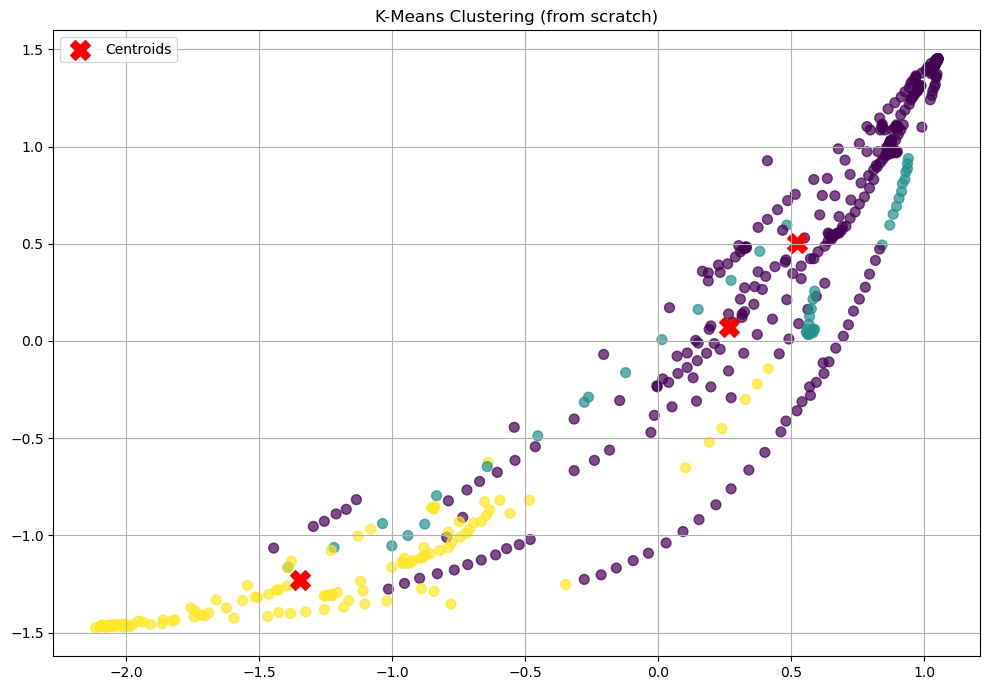

In [77]:
# Suppose 'scaled_data' is your standardized 2D array from earlier
centroids, labels = kmeans(scaled_data, k=3, random_state=42)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (from scratch)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()